In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_unicode=True)
from IPython.display import display, Math

In [13]:
q = -50 # W/m^2
Q = 500 # W/m^3
k = 1 # W/mC 

e0 = {'x':[0.000,0.000,0.020],
      'y':[0.000,0.050,0.000],
      'n':[0,1,2]}

e1 = {'x':[0.020,0.000,0.020],
      'y':[0.000,0.050,0.050],
      'n':[2,1,3]}

e2 = {'x':[0.020,0.020,0.040],
      'y':[0.000,0.050,0.000],
      'n':[2,3,4]}

e3 = {'x':[0.040,0.020,0.040],
      'y':[0.000,0.050,0.050],
      'n':[4,3,5]}

e4 = {'x':[0.040,0.040,0.060],
      'y':[0.000,0.050,0.000],
      'n':[4,5,6]}

e5 = {'x':[0.060,0.040,0.060],
      'y':[0.000,0.050,0.050],
      'n':[6,5,7]}

e6 = {'x':[0.060,0.060,0.080],
      'y':[0.000,0.050,0.000],
      'n':[6,7,8]}

e7 = {'x':[0.080,0.060,0.080],
      'y':[0.000,0.050,0.050],
      'n':[8,7,9]}

e8 = {'x':[0.080,0.080,0.100],
      'y':[0.000,0.050,0.000],
      'n':[8,9,10]}

e9 = {'x':[0.100,0.080,0.100],
      'y':[0.000,0.050,0.050],
      'n':[10,9,11]}


elementos = [e0, e1, e2, e3, e4, e5, e6, e7, e8, e9 ]

In [14]:
from Elementos import ElementosTriangular as elemento

In [15]:
desarrollo_elemento = elemento()

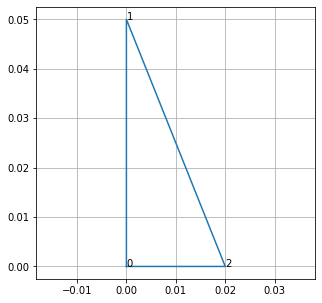

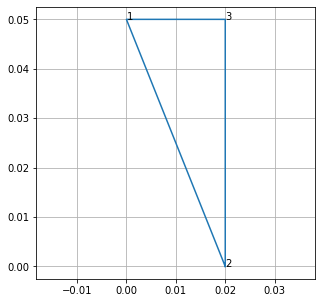

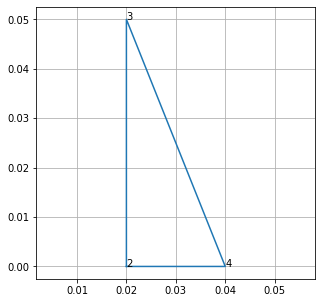

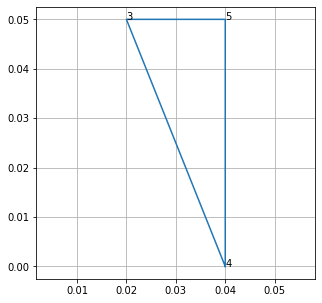

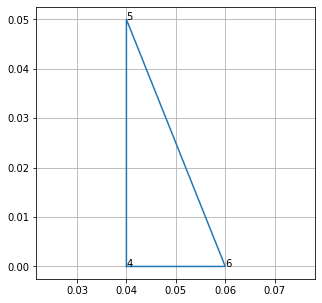

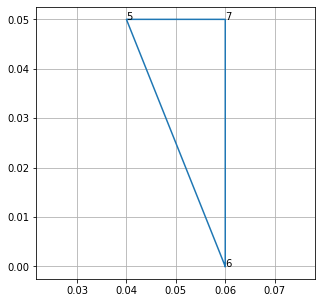

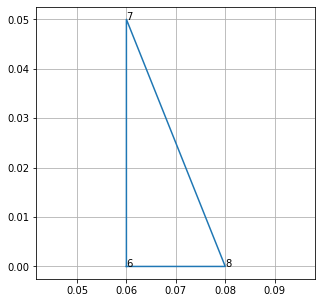

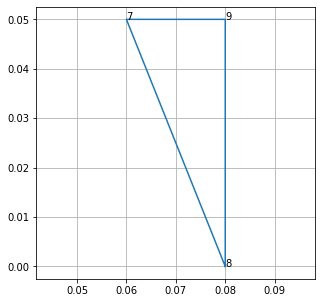

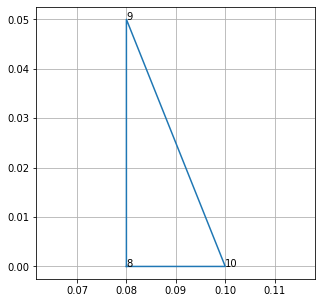

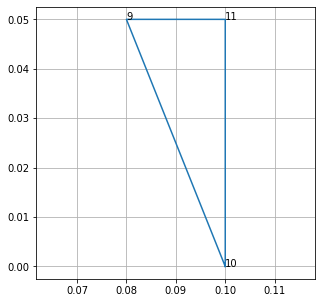

In [18]:
for ele in elementos:
    desarrollo_elemento.graficarElemento(ele)

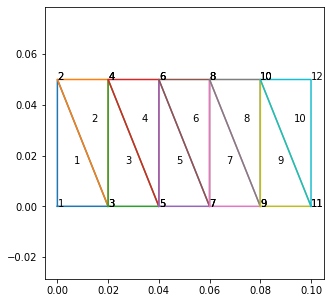

In [19]:
i = 0
n = 0

plt.figure(figsize=(5,5))
for el in elementos:
    plt.plot(el['x'] + [el['x'][0]], el['y']+[el['y'][0]])
    x = np.array(el['x']).mean()
    y = np.array(el['y']).mean()
    plt.text(x,y,i+1)
    for x,y,n in zip(el['x'],el['y'], el['n']):
        plt.text(x,y,n+1)
    n=max(n,max(el['n']))
    i=i+1
plt.axis('equal')    
plt.show()

In [22]:
for el in elementos:
    A = (1/2)*np.abs(el['x'][0]*(el['y'][1] - el['y'][2]) + 
               el['x'][1]*(el['y'][2] - el['y'][0]) +
               el['x'][2]*(el['y'][0] - el['y'][1]))
    el.update(A=A)
    el.update(b1 = el['y'][1] - el['y'][2])
    el.update(c1 = el['x'][2] - el['x'][1])
    el.update(b2 = el['y'][2] - el['y'][0])
    el.update(c2 = el['x'][0] - el['x'][2])
    el.update(b3 = el['y'][0] - el['y'][1])
    el.update(c3 = el['x'][1] - el['x'][0])

In [56]:
# Matrrices K y F
for el in elementos:
    K = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            K[i,j] = e[f'b{i+1}']*e[f'b{j+1}'] + e[f'c{i+1}']*e[f'c{j+1}']
    K = k/4/e['A']*K
    el.update({'K':K})
    F = np.array([1,1,1])*(1/3)*A*Q
    el.update({'F':F})

In [57]:
e0

{'x': [0.0, 0.0, 0.02],
 'y': [0.0, 0.05, 0.0],
 'n': [0, 1, 2],
 'A': 0.0005,
 'b1': 0.05,
 'c1': 0.02,
 'b2': 0.0,
 'c2': -0.02,
 'b3': -0.05,
 'c3': 0.0,
 'K': array([[ 0.4,  0. , -0.4],
        [ 0. ,  2.5, -2.5],
        [-0.4, -2.5,  2.9]]),
 'F': array([0.08333333, 0.08333333, 0.08333333])}

In [58]:
#Conduccion
F1 = q*0.05/2*np.array([1,1,0])
e0['F'] = e0['F'] + F1

In [59]:
elementos

[{'x': [0.0, 0.0, 0.02],
  'y': [0.0, 0.05, 0.0],
  'n': [0, 1, 2],
  'A': 0.0005,
  'b1': 0.05,
  'c1': 0.02,
  'b2': 0.0,
  'c2': -0.02,
  'b3': -0.05,
  'c3': 0.0,
  'K': array([[ 0.4,  0. , -0.4],
         [ 0. ,  2.5, -2.5],
         [-0.4, -2.5,  2.9]]),
  'F': array([-1.16666667, -1.16666667,  0.08333333])},
 {'x': [0.02, 0.0, 0.02],
  'y': [0.0, 0.05, 0.05],
  'n': [2, 1, 3],
  'A': 0.0005,
  'b1': 0.0,
  'c1': 0.02,
  'b2': 0.05,
  'c2': 0.0,
  'b3': -0.05,
  'c3': -0.02,
  'K': array([[ 0.4,  0. , -0.4],
         [ 0. ,  2.5, -2.5],
         [-0.4, -2.5,  2.9]]),
  'F': array([0.08333333, 0.08333333, 0.08333333])},
 {'x': [0.02, 0.02, 0.04],
  'y': [0.0, 0.05, 0.0],
  'n': [2, 3, 4],
  'A': 0.0005,
  'b1': 0.05,
  'c1': 0.02,
  'b2': 0.0,
  'c2': -0.02,
  'b3': -0.05,
  'c3': 0.0,
  'K': array([[ 0.4,  0. , -0.4],
         [ 0. ,  2.5, -2.5],
         [-0.4, -2.5,  2.9]]),
  'F': array([0.08333333, 0.08333333, 0.08333333])},
 {'x': [0.04, 0.02, 0.04],
  'y': [0.0, 0.05, 0.05]

In [60]:
for l, e in enumerate(elementos):

    print(f'Elemento {l+1}, Nodos: {e["n"]} ')
    display(Math(r'K_{{{}}}'.format(l+1) + sp.latex(sp.Matrix(e['K']))))
    display(Math(r'F_{{{}}}'.format(l+1) + sp.latex(sp.Matrix(e['F']))))

Elemento 1, Nodos: [0, 1, 2] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 2, Nodos: [2, 1, 3] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 3, Nodos: [2, 3, 4] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 4, Nodos: [4, 3, 5] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 5, Nodos: [4, 5, 6] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 6, Nodos: [6, 5, 7] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 7, Nodos: [6, 7, 8] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 8, Nodos: [8, 7, 9] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 9, Nodos: [8, 9, 10] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 10, Nodos: [10, 9, 11] 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
#Ensamblando la matriz K
K = np.zeros((n+1,n+1))
F = np.zeros((n+1))

for e in elementos:
    for i, j in enumerate(e['n']):
        for k, m in enumerate(e['n']):
            K[j,m] = K[j,m] + e['K'][i,k]
        F[j] = F[j] + e['F'][i]
sp.Matrix(K)
        

⎡0.4   0.0   -0.4  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                                      ⎥
⎢0.0   5.0   -2.5  -2.5  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢-0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   -2.5  -0.4  7.9   -2.5  -2.5  0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   -0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   0.0   -2.5  -0.4  7.9   -2.5  -2.5  0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   0.0   0.0   -0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0 ⎥
⎢                                                  

In [62]:
sp.Matrix(F)

⎡-1.16666666666667 ⎤
⎢                  ⎥
⎢-1.08333333333333 ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢       0.25       ⎥
⎢                  ⎥
⎢0.166666666666667 ⎥
⎢                  ⎥
⎣0.0833333333333334⎦

In [63]:
#lA TEMPERATUR CONOCIDA
Tf = np.array([None]*int(n+1), dtype=np.float)
Tf[10] = 0.0
Tf[11] = 0.0

C:\Users\uie70742\AppData\Local\Temp/ipykernel_23576/3907673270.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Tf = np.array([None]*int(n+1), dtype=np.float)


In [64]:
Tf

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.])

In [65]:
for i, t, in enumerate(Tf):
    if not np.isnan(t):
        for j in range(n+1):
            K[i,j] = 0
            if i==j:
                K[i,j] = 1
            F[i] = t

In [66]:
sp.Matrix(K)

⎡0.4   0.0   -0.4  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                                      ⎥
⎢0.0   5.0   -2.5  -2.5  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢-0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   -2.5  -0.4  7.9   -2.5  -2.5  0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   -0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   0.0   -2.5  -0.4  7.9   -2.5  -2.5  0.0   0.0   0.0   0.0 ⎥
⎢                                                                      ⎥
⎢0.0   0.0   0.0   0.0   -0.4  -2.5  3.7   -0.4  -0.4  0.0   0.0   0.0 ⎥
⎢                                                  

In [67]:
F

array([-1.16666667, -1.08333333,  0.25      ,  0.25      ,  0.25      ,
        0.25      ,  0.25      ,  0.25      ,  0.25      ,  0.25      ,
        0.        ,  0.        ])

In [68]:
#Resolvemos la ecuación KT = F
T = np.linalg.solve(K,F)
T

array([-4.60070179, -1.55529522, -1.68403512, -0.99322199, -0.88780598,
       -0.52603466, -0.41949807, -0.20750052, -0.12233401, -0.04021328,
        0.        ,  0.        ])

In [69]:
sp.Matrix(T)

⎡ -4.6007017903362  ⎤
⎢                   ⎥
⎢ -1.5552952223525  ⎥
⎢                   ⎥
⎢ -1.68403512366953 ⎥
⎢                   ⎥
⎢-0.993221987702138 ⎥
⎢                   ⎥
⎢-0.887805976201691 ⎥
⎢                   ⎥
⎢-0.526034662797438 ⎥
⎢                   ⎥
⎢-0.419498070260315 ⎥
⎢                   ⎥
⎢-0.207500520285183 ⎥
⎢                   ⎥
⎢-0.122334010937053 ⎥
⎢                   ⎥
⎢-0.0402132791250351⎥
⎢                   ⎥
⎢        0.0        ⎥
⎢                   ⎥
⎣        0.0        ⎦

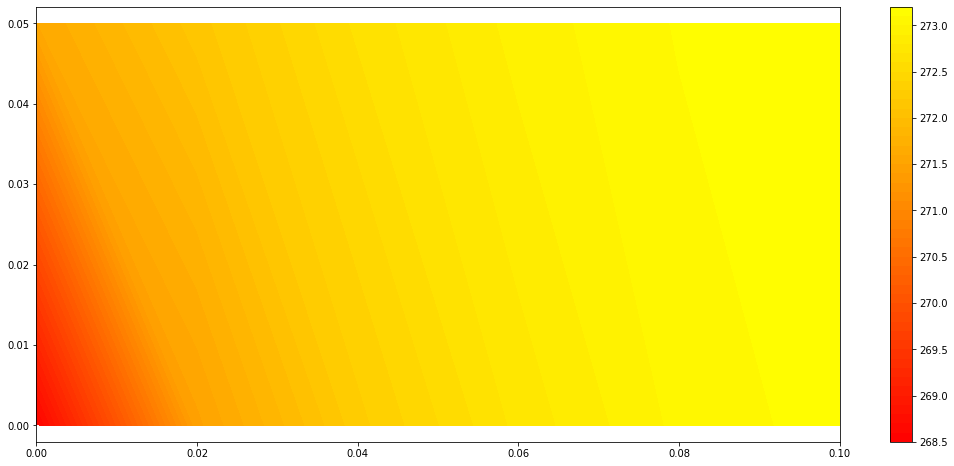

In [70]:
xx = np.array([0.0, 0.020, 0.040, 0.060, 0.080, 0.10])
yy = np.array([0.0,0.050])

xc, yc = np.meshgrid(xx,yy)
plt.figure(figsize=(18,8))
cs = plt.contourf(xc,yc, T.reshape(xc.T.shape).T + 273.15, cmap = plt.cm.autumn, levels=50)

plt.axis('equal')
plt.colorbar(cs)
plt.show()